### Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GoogleReview_data_cleaned.csv to GoogleReview_data_cleaned.csv


In [3]:
import pandas as pd

df = pd.read_csv("GoogleReview_data_cleaned.csv")

# Preview the first few rows
df.head()

,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


### Install and Import TextBlob

In [4]:
# Step 1: Install TextBlob
!pip install -q textblob

# Step 2: Import and use it
from textblob import TextBlob

# Example: Analyze first 5 reviews
for review in df['Review'].head():
    blob = TextBlob(str(review))
    print(f"Review: {review[:60]}...")
    print(f"Polarity: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")
    print("---")


Review: Came here for the High Tea. Great service especially by Mr. ...
Polarity: 0.42699999999999994, Subjectivity: 0.708
---
Review: 5 stars for the service, even though some of the staffs need...
Polarity: 0.25, Subjectivity: 0.25
---
Review: Hi, thank you for your service. But! i feel so sorry for the...
Polarity: 0.14166666666666666, Subjectivity: 0.42500000000000004
---
Review: I have the worse buffer dinner ever so far. The spread is so...
Polarity: -0.3814583333333333, Subjectivity: 0.6447916666666668
---
Review: That's are Known 5 Elmark " 9H72 " & KDK " 3 K14Y9 & 1 K14Y5...
Polarity: 0.6, Subjectivity: 1.0
---


### Apply TextBlob to All Reviews

In [5]:
# Step 3: Apply TextBlob to entire dataset
df['TextBlob_Polarity'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['TextBlob_Subjectivity'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Show summary
print(df[['Review', 'TextBlob_Polarity', 'TextBlob_Subjectivity']].head())


                                              Review  TextBlob_Polarity  \
0  Came here for the High Tea. Great service espe...           0.427000   
1  5 stars for the service, even though some of t...           0.250000   
2  Hi, thank you for your service. But! i feel so...           0.141667   
3  I have the worse buffer dinner ever so far. Th...          -0.381458   
4  That's are Known 5 Elmark " 9H72 " & KDK " 3 K...           0.600000   

   TextBlob_Subjectivity  
0               0.708000  
1               0.250000  
2               0.425000  
3               0.644792  
4               1.000000  


### Install & Apply VADER Sentiment

In [6]:
# Install VADER
!pip install -q vaderSentiment

# Import the analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize
analyzer = SentimentIntensityAnalyzer()

# Example on first 5 reviews
for review in df['Review'].head():
    score = analyzer.polarity_scores(str(review))
    print(f"Review: {review[:60]}...")
    print(score)
    print("---")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00
Review: Came here for the High Tea. Great service especially by Mr. ...
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.9313}
---
Review: 5 stars for the service, even though some of the staffs need...
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.6542}
---
Review: Hi, thank you for your service. But! i feel so sorry for the...
{'neg': 0.039, 'neu': 0.687, 'pos': 0.274, 'compound': 0.9283}
---
Review: I have the worse buffer dinner ever so far. The spread is so...
{'neg': 0.243, 'neu': 0.757, 'pos': 0.0, 'compound': -0.8977}
---
Review: That's are Known 5 Elmark " 9H72 " & KDK " 3 K14Y9 & 1 K14Y5...
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.6249}
---


### Add VADER Scores for All Reviews

In [7]:
# Define a function to apply VADER
def vader_scores(text):
    score = analyzer.polarity_scores(str(text))
    return pd.Series([score['neg'], score['neu'], score['pos'], score['compound']])

# Apply and add to DataFrame
df[['VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound']] = df['Review'].apply(vader_scores)

# Show example
df[['Review', 'VADER_Compound']].head()


,Review,VADER_Compound
0,Came here for the High Tea. Great service espe...,0.9313
1,"5 stars for the service, even though some of t...",0.6542
2,"Hi, thank you for your service. But! i feel so...",0.9283
3,I have the worse buffer dinner ever so far. Th...,-0.8977
4,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",0.6249


### Compare TextBlob vs VADER (Agreement Check)

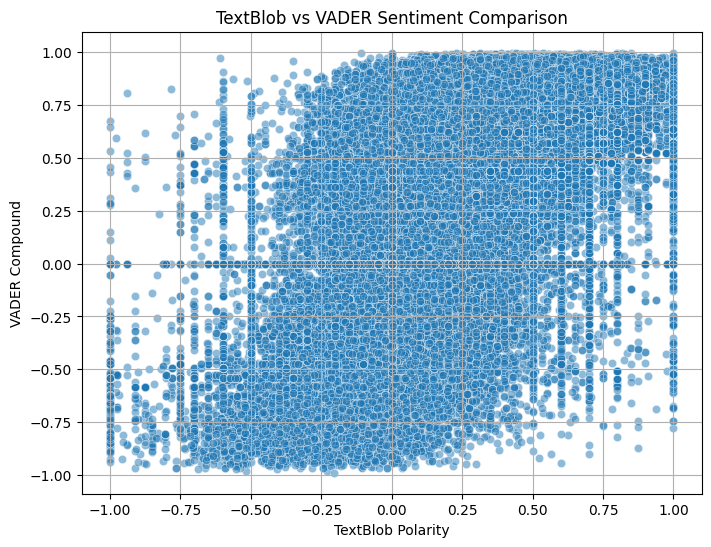

Correlation between TextBlob and VADER: 0.572


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of both sentiment scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TextBlob_Polarity', y='VADER_Compound', data=df, alpha=0.5)
plt.title('TextBlob vs VADER Sentiment Comparison')
plt.xlabel('TextBlob Polarity')
plt.ylabel('VADER Compound')
plt.grid(True)
plt.show()

# Correlation between the two
correlation = df['TextBlob_Polarity'].corr(df['VADER_Compound'])
print("Correlation between TextBlob and VADER:", round(correlation, 3))


---
### **Sentiment Analysis Summary (TextBlob vs VADER)**

In this analysis, sentiment scores were computed for a collection of Google restaurant reviews using two unsupervised lexicon-based approaches: **TextBlob** and **VADER**. TextBlob provided polarity and subjectivity scores, while VADER offered compound sentiment scores and the proportion of negative, neutral, and positive tones. The results showed that both tools generally aligned, with a **moderate positive correlation of 0.572** between TextBlob polarity and VADER compound scores. A scatter plot further illustrated that although the sentiment directions often matched, each tool captured slightly different linguistic nuances. These findings highlight the value of combining multiple sentiment analysis tools to better understand customer opinions in social media text.
